# Stats 701-Homework7 Winter 2018
## Hsuan-Yu Yeh 
### hsuanyu@umich.edu
I didn't discuss with others for this homework. For problem 1, I spent 1 hours to finish it. For problem 2, I spent about 1.5 hours for each. For problem 3, I spent 1.5 hours for it.

### Problem 1: Constructing pandas objects
Create pandas series and pandas DataFrame.

In [1]:
#Q1-1
import pandas as pd
import string
def primes():
    prime = list()
    prime.append(2)
    (m,n) = (2,1)
    yield 2
    while True:
        if all(m % p for p in prime) == True:
            prime.append(m)
            yield m
            m = m+1
        else:
            m = m+1
            continue

x = primes()
p = [next(x) for _ in range(0,10)]
l = [i for i in string.ascii_letters[0:10]]
s = pd.Series(p, index=l)
print(s)
type(s)

a     2
b     3
c     5
d     7
e    11
f    13
g    17
h    19
i    23
j    29
dtype: int64


pandas.core.series.Series

In [3]:
# Q1-2
import numpy as np
array = [['goat','goat','goat','goat','bird','bird','bird','bird','llama','llama','llama','llama'],['A','A','a','a','A','A','a','a','A','A','a','a'],['A','a','A','a','A','a','A','a','A','a','A','a']]
tuples = list(zip(*array))
index = pd.MultiIndex.from_tuples(tuples, names=['animal','parent1','parent2'])
d = {'score1':pd.Series([1,2,3,4,5,6,7,8,9,10,11,12], index=index), 'score2':pd.Series([2,4,4,6,6,8,8,10,10,12,12,14], index=index)}
s = pd.DataFrame(d)

s

score1  score2
animal parent1 parent2                
goat   A       A             1       2
               a             2       4
       a       A             3       4
               a             4       6
bird   A       A             5       6
               a             6       8
       a       A             7       8
               a             8      10
llama  A       A             9      10
               a            10      12
       a       A            11      12
               a            12      14

### Problem 2: Working with pandas DataFrames

In [5]:
# Q2-1
import os
os.chdir('/Users/yehhsuan-yu/Umich/Stats701')
iris = pd.read_csv('hsuanyu_hw7/iris.csv')
iris.info()
iris.head()
iris.Species.unique()
# how many data points: 150
# data type of columns: 4 are float and 1 is object
# colnames: Sepal.Length, Sepal.Width, Petal.Length, Petal.Width, Species
# how many species are included: 3, ('setosa', 'versicolor', 'virginica')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
# Q2-2
iris.head()
iris.at[34, 'Petal.Width'] = 0.2
iris.at[37, ['Sepal.Width', 'Petal.Length']] = [3.6, 1.4]
iris.loc[34]
iris.loc[37]

Sepal.Length       4.9
Sepal.Width        3.6
Petal.Length       1.4
Petal.Width        0.1
Species         setosa
Name: 37, dtype: object

In [7]:
# Q2-3
iris['Septal.Ratio'] = iris['Sepal.Length']/iris['Sepal.Width']
iris['Petal.Ratio'] = iris['Petal.Length']/iris['Petal.Width']
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,Septal.Ratio,Petal.Ratio
0,5.1,3.5,1.4,0.2,setosa,1.457143,7.0
1,4.9,3.0,1.4,0.2,setosa,1.633333,7.0
2,4.7,3.2,1.3,0.2,setosa,1.468750,6.5
3,4.6,3.1,1.5,0.2,setosa,1.483871,7.5
4,5.0,3.6,1.4,0.2,setosa,1.388889,7.0


In [8]:
# Q2-4
iris.to_csv('iris_corrected.csv')

In [9]:
# Q2-5
iris.groupby('Species')['Septal.Ratio','Petal.Ratio'].aggregate([np.mean, np.median, min, max, np.std])

Septal.Ratio                                         Petal.Ratio  \
                   mean    median       min       max       std        mean   
Species                                                                       
setosa         1.470188  1.463063  1.268293  1.956522  0.118750    6.908000   
versicolor     2.160402  2.161290  1.764706  2.818182  0.228658    3.242837   
virginica      2.230453  2.169540  1.823529  2.961538  0.246992    2.780662   

                                                
              median       min   max       std  
Species                                         
setosa      7.000000  2.666667  15.0  2.854545  
versicolor  3.240385  2.666667   4.1  0.312456  
virginica   2.666667  2.125000   4.0  0.407367

### Problem 3: Plotting pandas DataFrames
Plot the boxplot and scatter matrix plot.

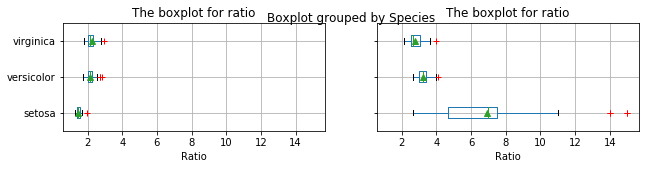

In [10]:
# Q3-1 
import matplotlib.pyplot as plt

box = pd.DataFrame.boxplot(iris, column=['Septal.Ratio','Petal.Ratio'], by='Species', sym='r+', vert=False, showmeans=True, figsize=(10,2), return_type='axes')
for ax in box.values:
    ax.set_title('The boxplot for ratio')
    ax.set_xlabel('Ratio')


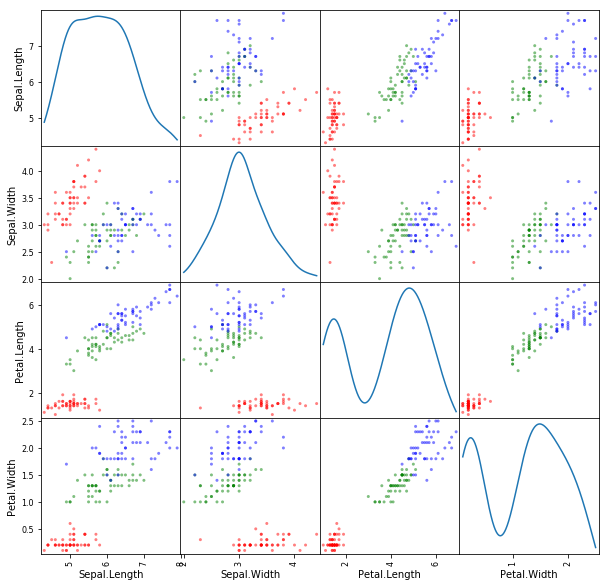

In [11]:
# Q3-2
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
iris_o = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width','Species']]
col = list()
for i in iris['Species']:
    if i=='setosa':
        col.append('r')
    elif i=='versicolor':
        col.append('g')
    elif i=='virginica':
        col.append('b')
iris_o = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width','Species']]
scatter_matrix(iris_o, figsize=(10,10), color=col, diagonal='kde')
plt.show()